<a href="https://colab.research.google.com/github/tahahamdii/recommandation-system/blob/main/recommandation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files

#Load dataset from csv file

In [2]:
from google.colab import files
uploaded = files.upload()

# Load the CSV into a DataFrame


In [3]:
df = pd.read_csv('/content/random_service_dataset.csv')

##Exploring the Dataset


# Get basic statistics about the dataset


In [4]:
df.describe()

,ID,Base Price,Total Reviews,Average Stars,Plus Achetés
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,500.500000,544.80700,485.788000,2.912200,248.55300
std,288.819436,263.54646,285.934348,1.123215,140.42038
min,1.000000,100.00000,1.000000,1.000000,1.00000
25%,250.750000,309.25000,243.750000,1.900000,131.00000
50%,500.500000,539.00000,480.000000,2.900000,248.00000
75%,750.250000,775.25000,736.250000,3.900000,366.25000
max,1000.000000,999.00000,997.000000,5.000000,499.00000


# Check for missing values


In [5]:
df.isnull().sum()


,0
ID,0
Title,0
Description,0
Base Price,0
Availability,0
Owner,0
Total Reviews,0
Average Stars,0
Plus Achetés,0


# View the distribution of 'Plus Achetés' (most purchased services)


<Axes: >

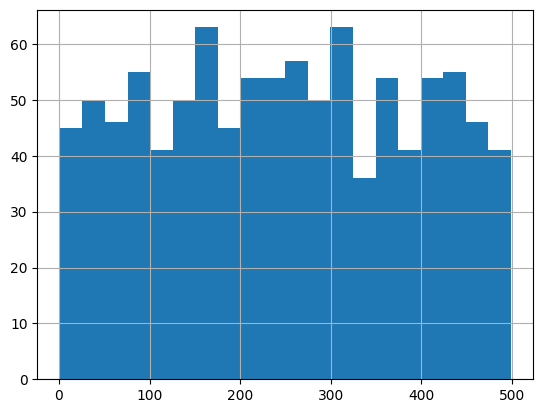

In [6]:
df['Plus Achetés'].hist(bins=20)

##Preprocessing

# One-Hot encode categorical variables like 'Title', 'Description', 'Owner'


In [7]:
df_encoded = pd.get_dummies(df, columns=['Title', 'Description', 'Owner'])



# Check the new DataFrame after encoding


In [8]:
df_encoded.head()

,ID,Base Price,Availability,Total Reviews,Average Stars,Plus Achetés,Title_Cloud Migration,Title_Consulting,Title_Customer Support,Title_Cybersecurity Assessment,...,Title_Software Development,Title_Web Design,Description_Affordable and reliable,Description_Comprehensive and efficient,Description_Expert-led service,Description_High-quality service,Description_Top-rated by clients,Owner_Provider A,Owner_Provider B,Owner_Provider C
0,1,574,True,27,2.3,15,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,2,545,False,3,1.6,38,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
2,3,899,True,763,4.2,453,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,4,445,False,791,1.2,288,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,5,303,False,559,1.3,73,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False


# Feature Engineering


In [9]:
df['price_per_review'] = df['Base Price'] / (df['Total Reviews'] + 1)  # To avoid division by zero
df['price_star_ratio'] = df['Base Price'] / (df['Average Stars'] + 1)  # Ratio of price to average stars
df['availability_numeric'] = df['Availability'].astype(int)

##Split Data for Training and Testing

# Split the data into features (X) and target (y)


In [10]:
X = df_encoded.drop(columns=['Plus Achetés', 'ID'])  # Drop the target column and 'ID'
y = df_encoded['Plus Achetés']

# Split the data into training and testing sets (80% train, 20% test)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Random Forest Regressor


In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using Random Forest
rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest Mean Squared Error: {rf_mse}")

Random Forest Mean Squared Error: 22215.596433499995


# Step 5: Linear Regression


In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions using Linear Regression
lr_pred = lr_model.predict(X_test)

# Evaluate the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_pred)
print(f"Linear Regression Mean Squared Error: {lr_mse}")


Linear Regression Mean Squared Error: 21067.82485149809


# Combine test data with predictions for easier analysis


In [14]:
test_results = X_test.copy()
test_results['Actual Plus Achetés'] = y_test
test_results['RF Predicted Plus Achetés'] = rf_pred
test_results['LR Predicted Plus Achetés'] = lr_pred

# Retrieve the service with the highest predicted purchases using Random Forest


In [15]:
most_purchased_rf_idx = test_results['RF Predicted Plus Achetés'].idxmax()
most_purchased_rf_service = df.iloc[most_purchased_rf_idx]

print("Service with the highest predicted purchases (Random Forest):")
print(most_purchased_rf_service)

Service with the highest predicted purchases (Random Forest):
ID                                              788
Title                      Cybersecurity Assessment
Description             Comprehensive and efficient
Base Price                                      815
Availability                                   True
Owner                                    Provider A
Total Reviews                                   896
Average Stars                                   2.8
Plus Achetés                                     71
price_per_review                           0.908584
price_star_ratio                         214.473684
availability_numeric                              1
Name: 787, dtype: object


# Retrieve the service with the highest predicted purchases using Linear Regression


In [16]:
most_purchased_lr_idx = test_results['LR Predicted Plus Achetés'].idxmax()
most_purchased_lr_service = df.iloc[most_purchased_lr_idx]

print("\nService with the highest predicted purchases (Linear Regression):")
print(most_purchased_lr_service)


Service with the highest predicted purchases (Linear Regression):
ID                                          741
Title                                Consulting
Description             Affordable and reliable
Base Price                                  511
Availability                               True
Owner                                Provider A
Total Reviews                               634
Average Stars                               4.8
Plus Achetés                                 79
price_per_review                       0.804724
price_star_ratio                      88.103448
availability_numeric                          1
Name: 740, dtype: object


# Get feature importance from Random Forest


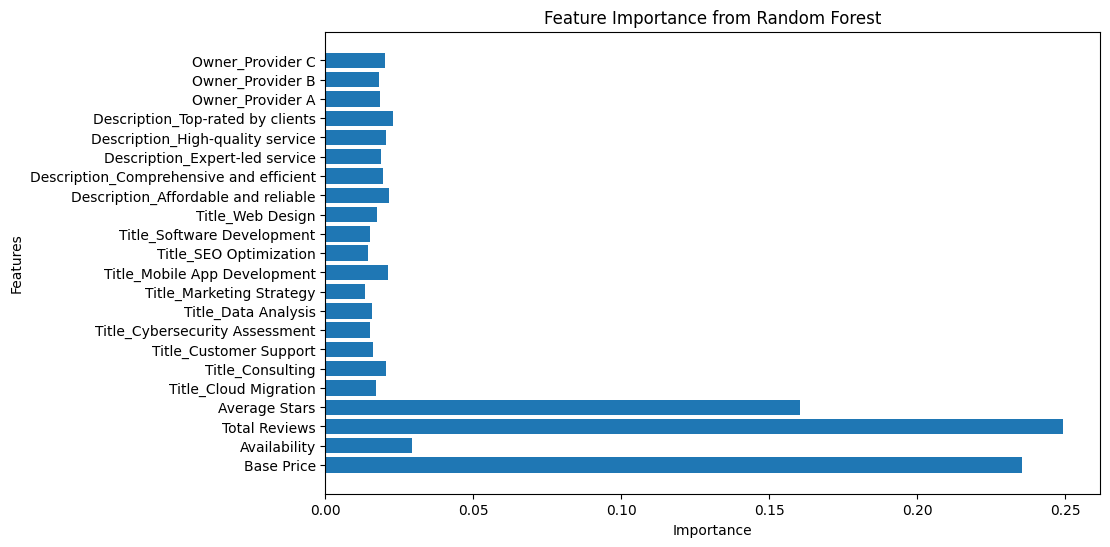

In [17]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()
